In [184]:
import pandas as pd
import glob
import regex as re
import querygen as qg
import pingouin as pg

import scipy.stats as stats

In [166]:
files = glob.glob("results_new_examples/*.csv")
dfs = [pd.read_csv(f, index_col=0) for f in files]
files

['results_new_examples/eval_results_DBpedia_oneshot_NousResearch-Hermes-3-Llama-3.2-3B-GGUF.csv',
 'results_new_examples/eval_results_BTO_oneshot_unsloth-Mistral-Small-3.1-24B-Instruct-2503-GGUF.csv',
 'results_new_examples/eval_results_Yago_oneshot_unsloth-Mistral-Small-3.1-24B-Instruct-2503-GGUF.csv',
 'results_new_examples/eval_results_Yago_oneshot_NousResearch-Hermes-3-Llama-3.2-3B-GGUF.csv',
 'results_new_examples/eval_results_UniProt_oneshot_NousResearch-Hermes-3-Llama-3.2-3B-GGUF.csv',
 'results_new_examples/eval_results_BTO_zeroshot_NousResearch-Hermes-3-Llama-3.1-8B-GGUF.csv',
 'results_new_examples/eval_results_DBpedia_oneshot_unsloth-Mistral-Small-3.1-24B-Instruct-2503-GGUF.csv',
 'results_new_examples/eval_results_DBpedia_oneshot_NousResearch-Hermes-3-Llama-3.1-8B-GGUF.csv',
 'results_new_examples/eval_results_UniProt_oneshot_bartowski-Qwen2.5-Coder-32B-Instruct-GGUF.csv',
 'results_new_examples/eval_results_Yago_oneshot_NousResearch-Hermes-3-Llama-3.1-8B-GGUF.csv',
 'resul

In [167]:
dfs

[      f1_score  precision    recall  f1_score_rel  precision_rel  recall_rel  \
 0     0.285714       0.25  0.333333           0.4       0.333333         0.5   
 1     0.000000       0.00  0.000000           0.0       0.000000         0.0   
 2     0.857143       0.75  1.000000           0.4       0.333333         0.5   
 3     1.000000       1.00  1.000000           0.5       0.500000         0.5   
 4     0.000000       0.00  0.000000           0.0       0.000000         0.0   
 ...        ...        ...       ...           ...            ...         ...   
 1912  0.000000       0.00  0.000000           0.0       0.000000         0.0   
 1913  0.923077       1.00  0.857143           1.0       1.000000         1.0   
 1914  0.000000       0.00  0.000000           0.0       0.000000         0.0   
 1915  0.000000       0.00  0.000000           0.0       0.000000         0.0   
 1916  0.222222       0.50  0.142857           0.0       0.000000         0.0   
 
         ged  normed_ged  

In [168]:

def graph_from_erl(erl: qg.EnrichedEntitiesRelations):
    G = qg.nx.DiGraph()
    for node in erl.entities:
        G.add_node(node.identifier, label=node.type)
    for link in erl.relations:
        G.add_edge(
            link.entity,
            link.target,
            weight=link.link.instance_count,
            label=link.relation,
        )
    return G

In [169]:
model_map = {
    "NousResearch Hermes 3 Llama 3.2 3B": "Hermes 3 3B",
    "NousResearch Hermes 3 Llama 3.1 8B": "Hermes 3 8B",
    "bartowski Mistral Small Instruct": "Mistral Small 24B",
    "bartowski Qwen2.5 Coder 32B": "Qwen2.5 Coder 32B",
    "bartowski Qwen2.5 Instruct 32B": "Qwen2.5 Instruct 32B",
}
chosen_models = [
    "Hermes 3 3B",
    "Hermes 3 8B",
    "Qwen2.5 Coder 32B",
    "Qwen2.5 Instruct 32B",
]

In [170]:
dfs_model_clean = []
for f, df in zip(files, dfs):
    # data=re.findall(r"results/eval_results_(\w+)_.*", f)[0]
    # prompt_type=re.findall(r"results/eval_results_(\w+)_.*", f)[0]
    model = re.findall(r"eval_results_\w+_(.+)\.csv", f)[0]
    # df['prompt_type'] = prompt_type
    df["model"] = model.replace("_", " ").replace("-", " ")
    df["model"] = df["model"].apply(
        lambda x: next((v for k, v in model_map.items() if x.startswith(k)), x)
    )
    df = df[df["model"].isin(chosen_models)]
    dfs_model_clean.append(df)
df = pd.concat(dfs_model_clean)
df

/var/folders/w0/5b7f2srd2sb_56zjv17vqnym0000gn/T/ipykernel_4709/2126750160.py:13: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(dfs_model_clean)


,f1_score,precision,recall,f1_score_rel,precision_rel,recall_rel,ged,normed_ged,response,model,cfg_name,zeroshot,stage,erl,generator,n_nodes,seed,erl_loaded
0,0.285714,0.25,0.333333,0.400000,0.333333,0.500,5.0,0.285714,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,False,raw,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3.0,13.0,"relations=[EnrichedRelation(entity='work', rel..."
1,0.000000,0.00,0.000000,0.000000,0.000000,0.000,7.0,0.000000,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,False,constrained,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3.0,13.0,"relations=[EnrichedRelation(entity='work', rel..."
2,0.857143,0.75,1.000000,0.400000,0.333333,0.500,4.0,0.428571,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,False,aligned,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3.0,13.0,"relations=[EnrichedRelation(entity='work', rel..."
3,1.000000,1.00,1.000000,0.500000,0.500000,0.500,2.0,0.600000,A person has their state of origin in a countr...,Hermes 3 3B,DBpedia,False,raw,"{""relations"":[{""entity"":""person"",""relation"":""s...",human,3.0,15.0,"relations=[EnrichedRelation(entity='person', r..."
4,0.000000,0.00,0.000000,0.000000,0.000000,0.000,6.0,-0.200000,A person has their state of origin in a countr...,Hermes 3 3B,DBpedia,False,constrained,"{""relations"":[{""entity"":""person"",""relation"":""s...",human,3.0,15.0,"relations=[EnrichedRelation(entity='person', r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,0.000000,0.00,0.000000,0.000000,0.000000,0.000,5.0,0.000000,A sports team has a member and the same member...,Qwen2.5 Coder 32B,DBpedia,False,constrained,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7.0,125.0,relations=[EnrichedRelation(entity='sports tea...
2099,0.000000,0.00,0.000000,0.000000,0.000000,0.000,6.0,-0.200000,A sports team has a member and the same member...,Qwen2.5 Coder 32B,DBpedia,False,aligned,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7.0,125.0,relations=[EnrichedRelation(entity='sports tea...
2100,0.666667,0.80,0.571429,0.166667,0.250000,0.125,12.0,0.076923,"A person is a member of a sports team, has dir...",Qwen2.5 Coder 32B,DBpedia,False,raw,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7.0,127.0,relations=[EnrichedRelation(entity='sports tea...
2101,0.000000,0.00,0.000000,0.000000,0.000000,0.000,93.0,-0.056818,"A person is a member of a sports team, has dir...",Qwen2.5 Coder 32B,DBpedia,False,constrained,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7.0,127.0,relations=[EnrichedRelation(entity='sports tea...


In [171]:
df['n_nodes']= df['n_nodes'].astype(int)

In [172]:
df["model"].unique()

array(['Hermes 3 3B', 'Hermes 3 8B', 'Qwen2.5 Coder 32B'], dtype=object)

In [173]:
df["prompt_type"] = df["zeroshot"].apply(lambda x: "zero shot" if x else "one shot")
df.drop(columns=["zeroshot"], inplace=True)
df

,f1_score,precision,recall,f1_score_rel,precision_rel,recall_rel,ged,normed_ged,response,model,cfg_name,stage,erl,generator,n_nodes,seed,erl_loaded,prompt_type
0,0.285714,0.25,0.333333,0.400000,0.333333,0.500,5.0,0.285714,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,raw,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3,13.0,"relations=[EnrichedRelation(entity='work', rel...",one shot
1,0.000000,0.00,0.000000,0.000000,0.000000,0.000,7.0,0.000000,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,constrained,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3,13.0,"relations=[EnrichedRelation(entity='work', rel...",one shot
2,0.857143,0.75,1.000000,0.400000,0.333333,0.500,4.0,0.428571,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,aligned,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3,13.0,"relations=[EnrichedRelation(entity='work', rel...",one shot
3,1.000000,1.00,1.000000,0.500000,0.500000,0.500,2.0,0.600000,A person has their state of origin in a countr...,Hermes 3 3B,DBpedia,raw,"{""relations"":[{""entity"":""person"",""relation"":""s...",human,3,15.0,"relations=[EnrichedRelation(entity='person', r...",one shot
4,0.000000,0.00,0.000000,0.000000,0.000000,0.000,6.0,-0.200000,A person has their state of origin in a countr...,Hermes 3 3B,DBpedia,constrained,"{""relations"":[{""entity"":""person"",""relation"":""s...",human,3,15.0,"relations=[EnrichedRelation(entity='person', r...",one shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,0.000000,0.00,0.000000,0.000000,0.000000,0.000,5.0,0.000000,A sports team has a member and the same member...,Qwen2.5 Coder 32B,DBpedia,constrained,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7,125.0,relations=[EnrichedRelation(entity='sports tea...,one shot
2099,0.000000,0.00,0.000000,0.000000,0.000000,0.000,6.0,-0.200000,A sports team has a member and the same member...,Qwen2.5 Coder 32B,DBpedia,aligned,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7,125.0,relations=[EnrichedRelation(entity='sports tea...,one shot
2100,0.666667,0.80,0.571429,0.166667,0.250000,0.125,12.0,0.076923,"A person is a member of a sports team, has dir...",Qwen2.5 Coder 32B,DBpedia,raw,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7,127.0,relations=[EnrichedRelation(entity='sports tea...,one shot
2101,0.000000,0.00,0.000000,0.000000,0.000000,0.000,93.0,-0.056818,"A person is a member of a sports team, has dir...",Qwen2.5 Coder 32B,DBpedia,constrained,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7,127.0,relations=[EnrichedRelation(entity='sports tea...,one shot


In [174]:
df_clean = df.dropna()
df_clean.describe()

,f1_score,precision,recall,f1_score_rel,precision_rel,recall_rel,ged,normed_ged,n_nodes,seed
count,16029.000000,16029.000000,16029.000000,16029.000000,16029.000000,16029.000000,16029.000000,16029.000000,16029.000000,16029.000000
mean,0.276641,0.289893,0.272748,0.329031,0.337808,0.328157,6.914592,0.209643,3.496163,56.307692
std,0.381626,0.396874,0.382080,0.436673,0.446509,0.438852,19.866783,0.323810,1.593697,37.794846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.384615,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,24.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,53.000000
75%,0.600000,0.666667,0.571429,0.888889,1.000000,1.000000,7.000000,0.400000,5.000000,88.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,406.000000,1.000000,10.000000,231.000000


In [175]:
df["erl_loaded"] = df["erl"].apply(qg.EnrichedEntitiesRelations.model_validate_json)
# df["response_loaded"] = df["response"].apply(lambda x: qg.EnrichedEntitiesRelations.model_validate_json(x) if isinstance(x, str) else None)
df["erl_graph"] = df["erl_loaded"].apply(graph_from_erl)
# df["response_graph"] = df["response"].apply(lambda x: graph_from_erl if x is not None else None)

In [176]:
# df["normed_ged"] = 1 - df["ged"] / df["erl_graph"].apply(
#     lambda x: (len(x.nodes) + len(x.nodes))
# )

In [177]:
df_clean["generator"].unique(), df_clean["model"].unique()

(array(['human', 'llama', 'templated'], dtype=object),
 array(['Hermes 3 3B', 'Hermes 3 8B', 'Qwen2.5 Coder 32B'], dtype=object))

In [178]:
means = df_clean.groupby(
    ["n_nodes", "prompt_type", "stage", "model", "generator", "cfg_name"]
)[["f1_score", "normed_ged"]].mean()
stds= df_clean.groupby(
    ["n_nodes", "prompt_type", "stage", "model", "generator", "cfg_name"]
)[["f1_score", "normed_ged"]].std()
counts = df_clean.groupby(
    ["n_nodes", "stage", "prompt_type", "model", "generator", "cfg_name"]
)[["f1_score", "normed_ged"]].count()
means

f1_score  \
n_nodes prompt_type stage       model       generator cfg_name             
2       one shot    aligned     Hermes 3 3B llama     BTO       0.440952   
                                                      DBpedia   0.638889   
                                                      UniProt   0.557310   
                                                      Yago      0.575000   
                                            templated BTO       0.669369   
...                                                                  ...   
10      zero shot   aligned     Hermes 3 8B human     DBpedia   0.599265   
                    constrained Hermes 3 3B human     DBpedia   0.000000   
                                Hermes 3 8B human     DBpedia   0.000000   
                    raw         Hermes 3 3B human     DBpedia   0.000000   
                                Hermes 3 8B human     DBpedia   0.424370   

                                                                normed_ged  
n_nodes prompt_type stage       model       generator cfg_name              
2       one shot    aligned     Hermes 3 3B llama     BTO         0.354035  
                                                      DBpedia     0.470321  
                                                      UniProt     0.568528  
                                                      Yago        0.419066  
                                            templated BTO         0.438750  
...                                                                    ...  
10      zero shot   aligned     Hermes 3 8B human     DBpedia     0.240602  
                    constrained Hermes 3 3B human     DBpedia    -0.173005  
                                Hermes 3 8B human     DBpedia    -0.105263  
                    raw         Hermes 3 3B human     DBpedia    -0.084378  
                                Hermes 3 8B human     DBpedia    -0.023810  

[396 rows x 2 columns]

In [179]:
stds

f1_score  \
n_nodes prompt_type stage       model       generator cfg_name             
2       one shot    aligned     Hermes 3 3B llama     BTO       0.331966   
                                                      DBpedia   0.376867   
                                                      UniProt   0.357558   
                                                      Yago      0.361336   
                                            templated BTO       0.334016   
...                                                                  ...   
10      zero shot   aligned     Hermes 3 8B human     DBpedia   0.317158   
                    constrained Hermes 3 3B human     DBpedia   0.000000   
                                Hermes 3 8B human     DBpedia   0.000000   
                    raw         Hermes 3 3B human     DBpedia   0.000000   
                                Hermes 3 8B human     DBpedia   0.398119   

                                                                normed_ged  
n_nodes prompt_type stage       model       generator cfg_name              
2       one shot    aligned     Hermes 3 3B llama     BTO         0.298137  
                                                      DBpedia     0.340738  
                                                      UniProt     0.321497  
                                                      Yago        0.295550  
                                            templated BTO         0.333373  
...                                                                    ...  
10      zero shot   aligned     Hermes 3 8B human     DBpedia     0.265830  
                    constrained Hermes 3 3B human     DBpedia     0.111467  
                                Hermes 3 8B human     DBpedia     0.148865  
                    raw         Hermes 3 3B human     DBpedia     0.027946  
                                Hermes 3 8B human     DBpedia     0.235702  

[396 rows x 2 columns]

In [180]:
counts

f1_score  \
n_nodes stage   prompt_type model             generator cfg_name             
2       aligned one shot    Hermes 3 3B       llama     BTO             35   
                                                        DBpedia         90   
                                                        UniProt         57   
                                                        Yago            36   
                                              templated BTO             37   
...                                                                    ...   
10      raw     one shot    Hermes 3 3B       human     DBpedia          3   
                            Hermes 3 8B       human     DBpedia          3   
                            Qwen2.5 Coder 32B human     DBpedia          3   
                zero shot   Hermes 3 3B       human     DBpedia          3   
                            Hermes 3 8B       human     DBpedia          2   

                                                                  normed_ged  
n_nodes stage   prompt_type model             generator cfg_name              
2       aligned one shot    Hermes 3 3B       llama     BTO               35  
                                                        DBpedia           90  
                                                        UniProt           57  
                                                        Yago              36  
                                              templated BTO               37  
...                                                                      ...  
10      raw     one shot    Hermes 3 3B       human     DBpedia            3  
                            Hermes 3 8B       human     DBpedia            3  
                            Qwen2.5 Coder 32B human     DBpedia            3  
                zero shot   Hermes 3 3B       human     DBpedia            3  
                            Hermes 3 8B       human     DBpedia            2  

[396 rows x 2 columns]

In [181]:
column_map = {
    "f1_score": "$F_{1,node}$",
    "f1_score_rel": "$F_{1,rel.}$ ",
    "normed_ged": "$GED_{s}$",
    "stage": "Stage",
    "prompt_type": "Prompt Type",
    "model": "Version \\& Size",
    "n_nodes": "$k$",
    "generator": "Query Origin",
}

## Compare Query Origins on DBpedia with 8B model

In [189]:
query_gen_compare = df_clean[
    df_clean["model"].str.contains("3B")
    & df_clean["cfg_name"].str.contains("DBpedia")
    & df_clean["prompt_type"].str.contains("one shot")
    & ~df_clean["stage"].str.contains("constrained")
    & (df_clean["n_nodes"] < 6)
    & (df_clean["n_nodes"] > 2)
]
grouped_query_gen_compare = query_gen_compare.groupby(
    ["n_nodes", "generator", "stage"]
)[["f1_score", "normed_ged"]]
grouped_query_gen_compare_mean = grouped_query_gen_compare.mean()
grouped_query_gen_compare_std = grouped_query_gen_compare.std()
grouped_query_gen_compare_percentiles = grouped_query_gen_compare.quantile(
    [0.25, 0.5, 0.75]
)
grouped_query_gen_compare_mean = grouped_query_gen_compare_mean.rename(
    columns=column_map
).rename_axis(
    [column_map["n_nodes"], column_map["generator"], column_map["stage"]], axis=0
)
grouped_query_gen_compare_mean = grouped_query_gen_compare_mean.rename(
    columns={k: f"Mean {k}" for k in grouped_query_gen_compare_mean.columns}
)

# grouped_query_gen_compare_mean["TOST"] = ""
for n_nodes in query_gen_compare["n_nodes"].unique():
    for origin in ["llama", "templated"]:
        
        a = query_gen_compare[
            (query_gen_compare["generator"] == origin)
            & (query_gen_compare["n_nodes"] == n_nodes)
            & (query_gen_compare["stage"] == "aligned")
        ]["f1_score"].to_numpy()
        b = query_gen_compare[
            (query_gen_compare["generator"] == "human")
            & (query_gen_compare["n_nodes"] == n_nodes)
            & (query_gen_compare["stage"] == "aligned")
        ]["f1_score"].to_numpy()
        
        # Bayesian t-test (Welch's version)

        bound = 0.2
        # Unpaired two-sample t-test
        _, p_greater = stats.ttest_ind(a + bound, b, alternative="greater")
        _, p_less = stats.ttest_ind(a - bound, b, alternative="less")
        # Choose the maximum p-value
        pval = max(p_less, p_greater)
        test = stats.ttest_ind(a, b, equal_var=False)
        result = pg.bayesfactor_ttest(t=test.statistic, nx=a.shape[0], ny=a.shape[0], alternative="two-sided")
        # print(f"TOST: n_nodes = {n_nodes}, origin = {origin}, p = {pval:.3f}")
        print("--- n_nodes =", n_nodes, "and origin =", origin)
        print(f"TOST: p = {pval:5.3f} (\delta = {bound})")
        print(f"t-test (means): {test.statistic:.3f}, p-value: {test.pvalue:.3f}")
        print(f"Bayes Factor: {1/result:.3f} (H1/H0)")
        # print(f"t-statistic: {test.statistic:.3f}, p-value: {test.pvalue:.3f}")
        # grouped_query_gen_compare_mean.loc[
        #     (n_nodes, origin, "aligned"), "TOST"
        # ] = pval
with open("tables/compare_gen_query.tex", "w") as f:
    f.write(
        grouped_query_gen_compare_mean.to_latex(
            float_format="%.2f",
            caption="Comparison of query generation methods for LLama 3.2 3B on DBpedia with one shot prompts.",
            label="tab:compare_gen_query",
        )
    )
grouped_query_gen_compare_mean

--- n_nodes = 3 and origin = llama
TOST: p = 0.049 (\delta = 0.2)
t-test (means): -0.537, p-value: 0.598
Bayes Factor: 5.625 (H1/H0)
--- n_nodes = 3 and origin = templated
TOST: p = 0.094 (\delta = 0.2)
t-test (means): 1.547, p-value: 0.145
Bayes Factor: 2.103 (H1/H0)
--- n_nodes = 5 and origin = llama
TOST: p = 0.013 (\delta = 0.2)
t-test (means): -0.749, p-value: 0.465
Bayes Factor: 4.838 (H1/H0)
--- n_nodes = 5 and origin = templated
TOST: p = 0.013 (\delta = 0.2)
t-test (means): 1.075, p-value: 0.300
Bayes Factor: 3.684 (H1/H0)


<>:53: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\d'
/var/folders/w0/5b7f2srd2sb_56zjv17vqnym0000gn/T/ipykernel_4709/1116238688.py:53: SyntaxWarning: invalid escape sequence '\d'
  print(f"TOST: p = {pval:5.3f} (\delta = {bound})")


Mean $F_{1,node}$  Mean $GED_{s}$
$k$ Query Origin Stage                                     
3   human        aligned           0.731602        0.560033
                 raw               0.632035        0.419913
    llama        aligned           0.694558        0.436235
                 raw               0.668659        0.333792
    templated    aligned           0.833112        0.567331
                 raw               0.793896        0.523262
5   human        aligned           0.724583        0.353487
                 raw               0.738659        0.248499
    llama        aligned           0.685099        0.331580
                 raw               0.686659        0.234500
    templated    aligned           0.780024        0.425533
                 raw               0.759470        0.450540

In [191]:
grouped_query_gen_compare_std

f1_score  normed_ged
n_nodes generator stage                        
3       human     aligned  0.202639    0.353790
                  raw      0.250497    0.255567
        llama     aligned  0.316141    0.307155
                  raw      0.321537    0.293945
        templated aligned  0.236125    0.328482
                  raw      0.250522    0.342501
5       human     aligned  0.156154    0.234875
                  raw      0.149567    0.170987
        llama     aligned  0.228619    0.245791
                  raw      0.244100    0.188603
        templated aligned  0.203680    0.337107
                  raw      0.231809    0.304375

In [ ]:
for n_nodes in query_gen_compare["n_nodes"].unique():
    print("Two-sample t-test for n_nodes =", n_nodes)
    test = stats.ttest_ind(
        query_gen_compare[
            (query_gen_compare["generator"] == "templated")
            & (query_gen_compare["n_nodes"] == n_nodes)
            & (query_gen_compare["stage"] == "aligned")
        ]["f1_score"],
        query_gen_compare[
            (query_gen_compare["generator"] == "llama")
            & (query_gen_compare["n_nodes"] == n_nodes)
            & (query_gen_compare["stage"] == "aligned")
        ]["f1_score"],
        equal_var=False,
    )
    print(f"t-statistic: {test.statistic:.3f}, p-value: {test.pvalue:.3f}")

Two-sample t-test for n_nodes = 3
t-statistic: 3.470, p-value: 0.001
Two-sample t-test for n_nodes = 5
t-statistic: 2.997, p-value: 0.003


In [ ]:
grouped_query_gen_compare_mean

Mean $F_{1,node}$  Mean $GED_{s}$
$k$ Query Origin Stage                                     
3   human        aligned           0.731602        0.560033
                 raw               0.632035        0.419913
    llama        aligned           0.694558        0.436235
                 raw               0.668659        0.333792
    templated    aligned           0.833112        0.567331
                 raw               0.793896        0.523262
5   human        aligned           0.724583        0.353487
                 raw               0.738659        0.248499
    llama        aligned           0.685099        0.331580
                 raw               0.686659        0.234500
    templated    aligned           0.780024        0.425533
                 raw               0.759470        0.450540

In [ ]:
grouped_query_gen_compare_percentiles

f1_score  normed_ged
n_nodes generator stage                             
3       human     aligned 0.25  0.583333    0.366667
                          0.50  0.800000    0.571429
                          0.75  0.857143    0.800000
                  raw     0.25  0.450000    0.242857
                          0.50  0.666667    0.400000
                          0.75  0.800000    0.600000
        llama     aligned 0.25  0.400000    0.175000
                          0.50  0.800000    0.400000
                          0.75  1.000000    0.600000
                  raw     0.25  0.400000    0.152597
                          0.50  0.666667    0.222222
                          0.75  1.000000    0.600000
        templated aligned 0.25  0.666667    0.333333
                          0.50  1.000000    0.500000
                          0.75  1.000000    1.000000
                  raw     0.25  0.666667    0.222222
                          0.50  0.857143    0.500000
                          0.75  1.000000    1.000000
5       human     aligned 0.25  0.600000    0.202020
                          0.50  0.727273    0.333333
                          0.75  0.844444    0.449495
                  raw     0.25  0.600000    0.111111
                          0.50  0.727273    0.181818
                          0.75  0.844444    0.404040
        llama     aligned 0.25  0.571429    0.166667
                          0.50  0.666667    0.300000
                          0.75  0.857143    0.500000
                  raw     0.25  0.600000    0.100000
                          0.50  0.750000    0.222222
                          0.75  0.888889    0.363636
        templated aligned 0.25  0.600000    0.127083
                          0.50  0.800000    0.374126
                          0.75  1.000000    0.666667
                  raw     0.25  0.628205    0.200000
                          0.50  0.800000    0.416667
                          0.75  1.000000    0.659091

## Compare models across Datasets

In [ ]:
datasets = [
    "DBpedia",
    "UniProt",
    "BTO",
    "Yago",
    # "DNB",
]
quantiles = [0.25, 0.5, 0.75]
grouped_dfs: dict[str, pd.DataFrame] = {}
grouped_dfs_raw: dict[str, pd.DataFrame] = {}
for dataset in datasets:
    model_compare = df_clean[df_clean["cfg_name"].str.strip() == dataset]
    model_compare = model_compare[~model_compare["stage"].str.contains("constrained")]
    model_compare_selected=model_compare.groupby(
        [
            "n_nodes",
            "stage",
            "prompt_type",
            "model",
            # "generator",
        ]
    )[
        [
            "f1_score",
            "normed_ged",
            "f1_score_rel",
        ]
    ]
    grouped_model_compare = model_compare_selected.quantile(quantiles).rename_axis(
            [
                "n_nodes",
                "stage",
                "prompt_type",
                "model",
                "percentile",
            ]
        )
    grouped_model_compare_mean = model_compare_selected.mean()
    # append mean to the compare DataFrame with percentile as 'mean'
    grouped_model_compare_mean['percentile'] = 'mean'
    grouped_model_compare_mean.set_index(
        "percentile",
        append=True,
        inplace=True,
    )
    grouped_model_compare = pd.concat(
        [grouped_model_compare, grouped_model_compare_mean],
        axis=0,
    )
    
    grouped_dfs_raw[dataset] = (
        grouped_model_compare
        .reset_index()
        .copy()
    )
    grouped_model_compare = grouped_model_compare.rename(
        columns=column_map
    ).rename_axis(
        [
            column_map["n_nodes"],
            column_map["stage"],
            column_map["prompt_type"],
            column_map["model"],
            "Percentile",
            # column_map["generator"],
        ],
        axis=0,
    )
    grouped_dfs[dataset] = grouped_model_compare
    with open(f"tables/compare_model_{dataset}.tex", "w") as f:
        f.write(
            grouped_model_compare.to_latex(
                float_format="%.2f",
                caption=f"Comparison of models for {dataset}",
                label=f"tab:compare_model_{dataset}",
                # sparsify=False
            )
        )
dataset_keys = list(grouped_dfs.keys())
merged_grouped: pd.DataFrame = grouped_dfs[dataset_keys[0]].copy()
merged_grouped.rename(
    columns={
        "$F_{1,node}$": f"$F_{{1,node}}$_{dataset_keys[0]}",
        "$F_{1,rel.}$": f"$F_{{1,rel.}}$_{dataset_keys[0]}",
        "$GED_{s}$": f"$GED_{{s}}$_{dataset_keys[0]}",
    },
    inplace=True,
)
for dataset, grouped_df in list(grouped_dfs.items())[1:]:
    print(f"Merging {dataset} into the grouped DataFrame")
    merged_grouped = pd.merge(
        merged_grouped,
        grouped_dfs[dataset].rename(
            columns={
                column_map["f1_score"]: f"{column_map['f1_score']}_{dataset}",
                column_map["f1_score_rel"]: f"{column_map['f1_score_rel']}_{dataset}",
                column_map["normed_ged"]: f"{column_map['normed_ged']}_{dataset}",
            }
        ),
        on=[
            "$k$",
            "Stage",
            "Prompt Type",
            "Version \\& Size",
            "Percentile",
        ],
        # suffixes=(None, f"_{dataset}"),
    )
rename_map = (
    {
        f"{column_map['f1_score']}_{dataset}": f"{dataset} {column_map['f1_score']}"
        for dataset in datasets
    }
    | {
        f"{column_map['f1_score_rel']}_{dataset}": f"{dataset} {column_map['f1_score_rel']}"
        for dataset in datasets
    }
    | {
        f"{column_map['normed_ged']}_{dataset}": f"{dataset} {column_map['normed_ged']}"
        for dataset in datasets
    }
)
merged_grouped.rename(
    columns=rename_map,
    inplace=True,
)
with open("tables/compare_model_merged.tex", "w") as f:
    f.write(
        merged_grouped.to_latex(
            float_format="%.2f",
            caption="Comparison of models for DBpedia and UniProt",
            label="tab:compare_model_merged",
        )
    )

Merging UniProt into the grouped DataFrame
Merging BTO into the grouped DataFrame
Merging Yago into the grouped DataFrame


In [ ]:
grouped_model_compare

$F_{1,node}$  $GED_{s}$  \
$k$ Stage   Prompt Type Version \& Size   Percentile                            
2   aligned one shot    Hermes 3 3B       0.25            0.500000   0.312500   
                                          0.5             0.666667   0.450000   
                                          0.75            1.000000   0.666667   
                        Hermes 3 8B       0.25            0.500000   0.000000   
                                          0.5             0.500000   0.333333   
...                                                            ...        ...   
3   raw     zero shot   Hermes 3 8B       mean            0.014103   0.000214   
5   aligned one shot    Qwen2.5 Coder 32B mean            0.704806   0.572044   
    raw     one shot    Qwen2.5 Coder 32B mean            0.618533   0.386367   
7   aligned one shot    Qwen2.5 Coder 32B mean            0.693612   0.555383   
    raw     one shot    Qwen2.5 Coder 32B mean            0.597157   0.372464   

                                                      $F_{1,rel.}$   
$k$ Stage   Prompt Type Version \& Size   Percentile                 
2   aligned one shot    Hermes 3 3B       0.25             0.500000  
                                          0.5              1.000000  
                                          0.75             1.000000  
                        Hermes 3 8B       0.25             0.000000  
                                          0.5              0.000000  
...                                                             ...  
3   raw     zero shot   Hermes 3 8B       mean             0.028846  
5   aligned one shot    Qwen2.5 Coder 32B mean             0.823817  
    raw     one shot    Qwen2.5 Coder 32B mean             0.291881  
7   aligned one shot    Qwen2.5 Coder 32B mean             0.779053  
    raw     one shot    Qwen2.5 Coder 32B mean             0.274926  

[96 rows x 3 columns]

In [ ]:
merged_grouped

DBpedia $F_{1,node}$  \
$k$ Stage   Prompt Type Version \& Size   Percentile                         
2   aligned one shot    Hermes 3 3B       0.25                    0.500000   
                                          0.5                     0.800000   
                                          0.75                    1.000000   
                        Hermes 3 8B       0.25                    0.000000   
                                          0.5                     0.450000   
...                                                                    ...   
3   raw     zero shot   Hermes 3 3B       mean                    0.062009   
5   aligned one shot    Qwen2.5 Coder 32B mean                    0.749553   
    raw     one shot    Qwen2.5 Coder 32B mean                    0.700440   
7   aligned one shot    Qwen2.5 Coder 32B mean                    0.757543   
    raw     one shot    Qwen2.5 Coder 32B mean                    0.693872   

                                                      DBpedia $GED_{s}$  \
$k$ Stage   Prompt Type Version \& Size   Percentile                      
2   aligned one shot    Hermes 3 3B       0.25                 0.285714   
                                          0.5                  0.500000   
                                          0.75                 1.000000   
                        Hermes 3 8B       0.25                 0.270833   
                                          0.5                  0.333333   
...                                                                 ...   
3   raw     zero shot   Hermes 3 3B       mean                 0.007767   
5   aligned one shot    Qwen2.5 Coder 32B mean                 0.495874   
    raw     one shot    Qwen2.5 Coder 32B mean                 0.373437   
7   aligned one shot    Qwen2.5 Coder 32B mean                 0.435454   
    raw     one shot    Qwen2.5 Coder 32B mean                 0.328021   

                                                      $F_{1,rel.}$   \
$k$ Stage   Prompt Type Version \& Size   Percentile                  
2   aligned one shot    Hermes 3 3B       0.25             0.000000   
                                          0.5              1.000000   
                                          0.75             1.000000   
                        Hermes 3 8B       0.25             0.250000   
                                          0.5              1.000000   
...                                                             ...   
3   raw     zero shot   Hermes 3 3B       mean             0.039887   
5   aligned one shot    Qwen2.5 Coder 32B mean             0.768436   
    raw     one shot    Qwen2.5 Coder 32B mean             0.459508   
7   aligned one shot    Qwen2.5 Coder 32B mean             0.752725   
    raw     one shot    Qwen2.5 Coder 32B mean             0.478769   

                                                      UniProt $F_{1,node}$  \
$k$ Stage   Prompt Type Version \& Size   Percentile                         
2   aligned one shot    Hermes 3 3B       0.25                    0.500000   
                                          0.5                     0.666667   
                                          0.75                    1.000000   
                        Hermes 3 8B       0.25                    0.475000   
                                          0.5                     0.500000   
...                                                                    ...   
3   raw     zero shot   Hermes 3 3B       mean                    0.100787   
5   aligned one shot    Qwen2.5 Coder 32B mean                    0.567777   
    raw     one shot    Qwen2.5 Coder 32B mean                    0.126671   
7   aligned one shot    Qwen2.5 Coder 32B mean                    0.569803   
    raw     one shot    Qwen2.5 Coder 32B mean                    0.068754   

                                                      UniProt $GED_{s}$  \
$k$ Stage   Prompt Type Version \& Size   Percent

In [ ]:
grouped_dfs_raw

{'DBpedia':      n_nodes    stage prompt_type              model percentile  f1_score  \
 0          2  aligned    one shot        Hermes 3 3B       0.25  0.500000   
 1          2  aligned    one shot        Hermes 3 3B        0.5  0.800000   
 2          2  aligned    one shot        Hermes 3 3B       0.75  1.000000   
 3          2  aligned    one shot        Hermes 3 8B       0.25  0.000000   
 4          2  aligned    one shot        Hermes 3 8B        0.5  0.450000   
 ..       ...      ...         ...                ...        ...       ...   
 179       10      raw    one shot        Hermes 3 3B       mean  0.652778   
 180       10      raw    one shot        Hermes 3 8B       mean  0.601170   
 181       10      raw    one shot  Qwen2.5 Coder 32B       mean  0.667593   
 182       10      raw   zero shot        Hermes 3 3B       mean  0.000000   
 183       10      raw   zero shot        Hermes 3 8B       mean  0.424370   
 
      normed_ged  f1_score_rel  
 0      0.285714  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble="""\\usepackage{amsmath}""")
plt.style.use("fivethirtyeight")
# set background color to white of the figure and axes
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# def tikzplotlib_fix_ncols(obj):
#     """
#     workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
#     """
#     if hasattr(obj, "_ncols"):
#         obj._ncol = obj._ncols
#     for child in obj.get_children():
#         tikzplotlib_fix_ncols(child)


# https://github.com/nschloe/tikzplotlib/issues/567
# from matplotlib.lines import Line2D
# from matplotlib.legend import Legend

# Line2D._us_dashSeq = property(lambda self: self._dash_pattern[1])
# Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
# Legend._ncol = property(lambda self: self._ncols)

import seaborn as sns

palette = sns.color_palette('pastel').as_hex()
def adjust_lightness(color, amount=1.1):
    import matplotlib.colors as mc
    import colorsys

    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], np.maximum(0, np.minimum(1, amount * c[1])), c[2])

plt.rcParams.update({'errorbar.capsize': 2})

In [ ]:
grouped_dfs["UniProt"].index.names

FrozenList(['$k$', 'Stage', 'Prompt Type', 'Version \& Size', 'Percentile'])

In [ ]:
from matplotlib.lines import Line2D
# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]
unfilled_markers

[',',
 '1',
 '2',
 '3',
 '4',
 '+',
 'x',
 '|',
 '_',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11]

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


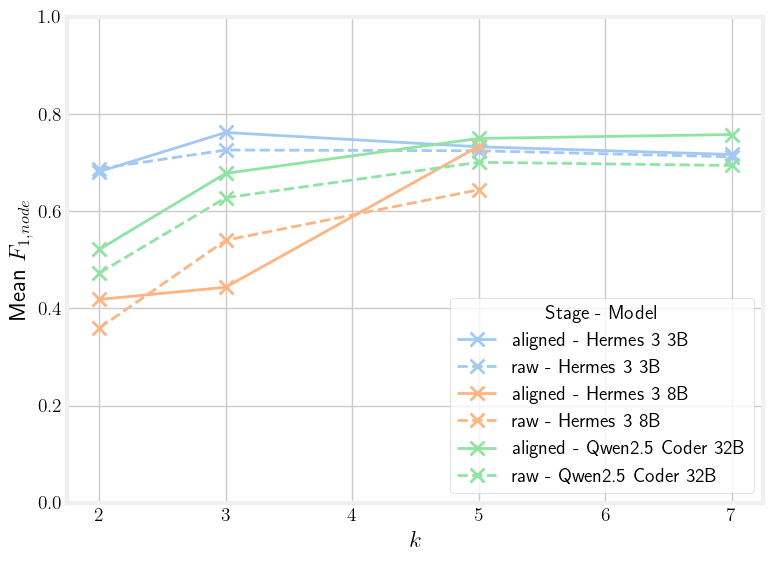

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


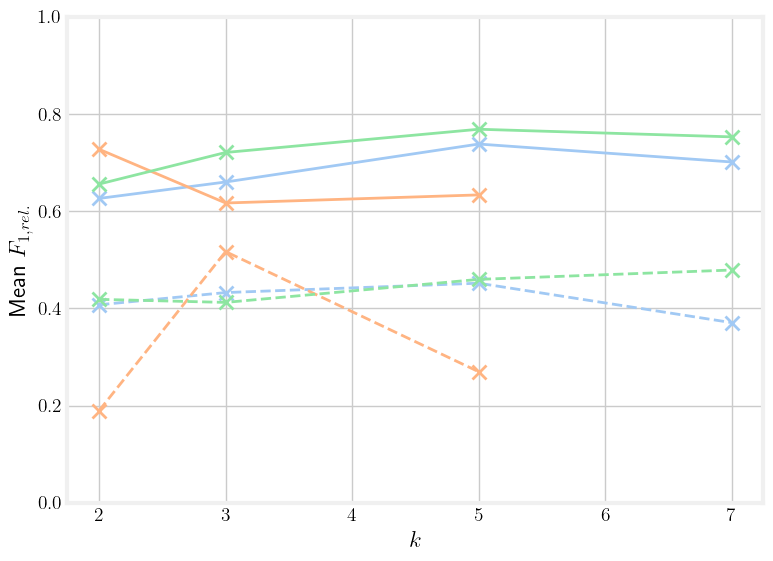

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


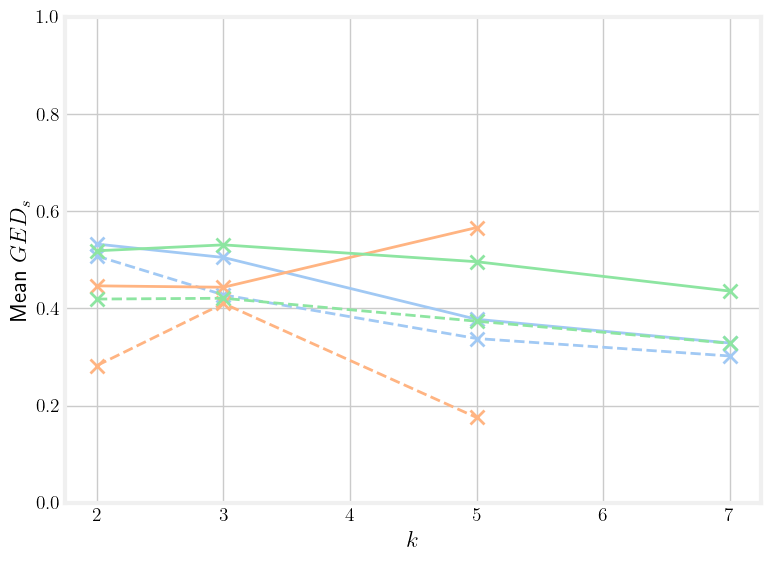

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


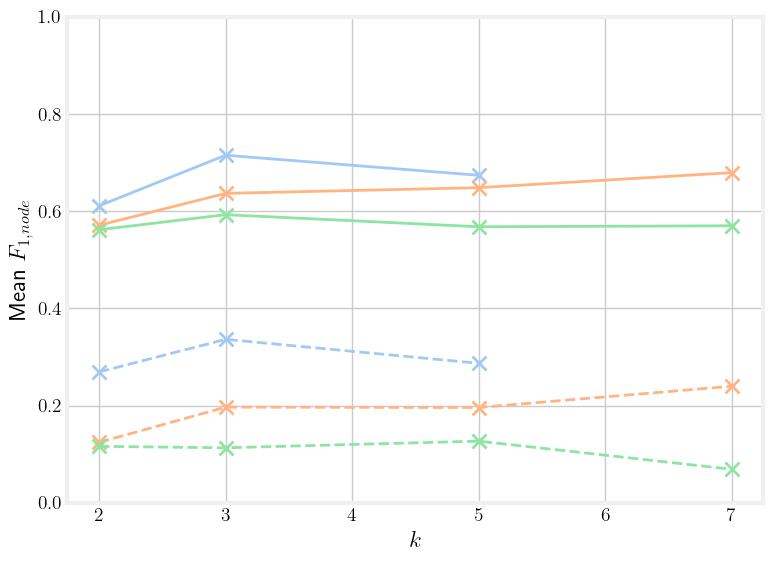

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


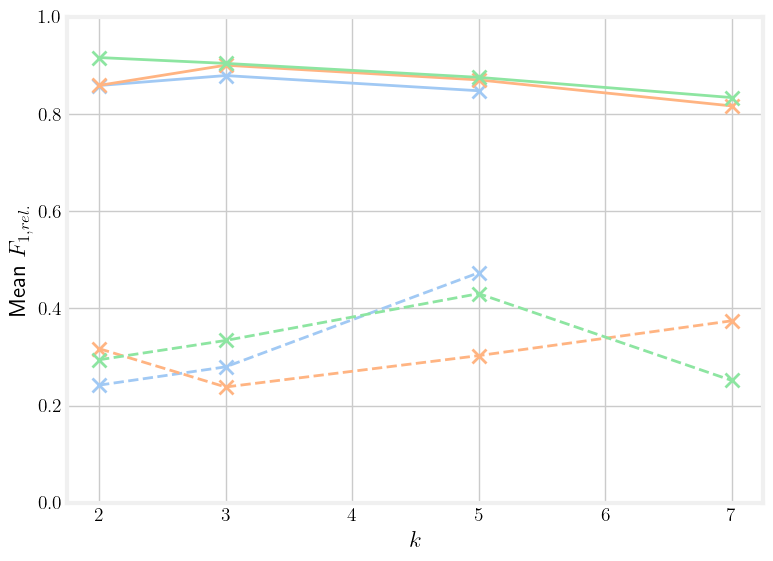

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


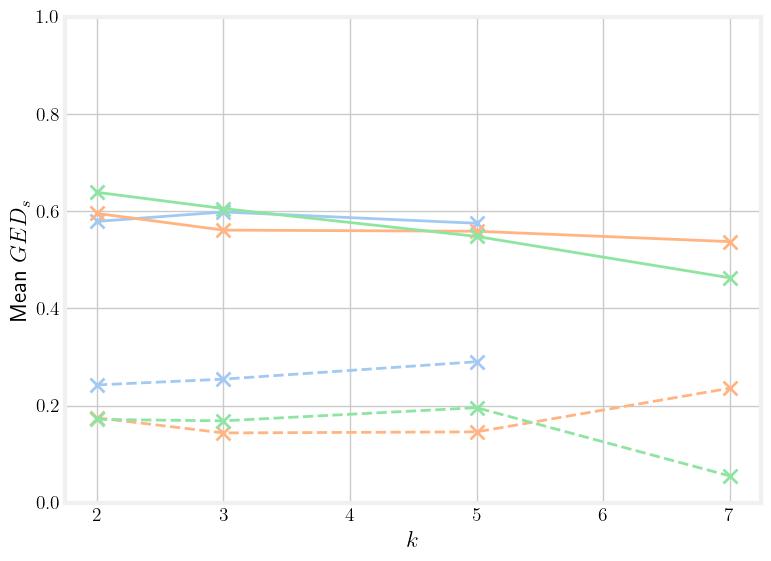

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


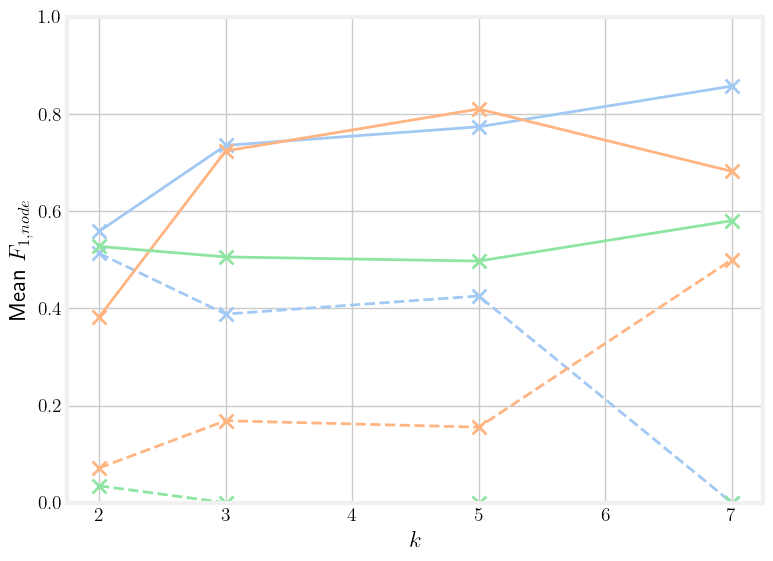

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


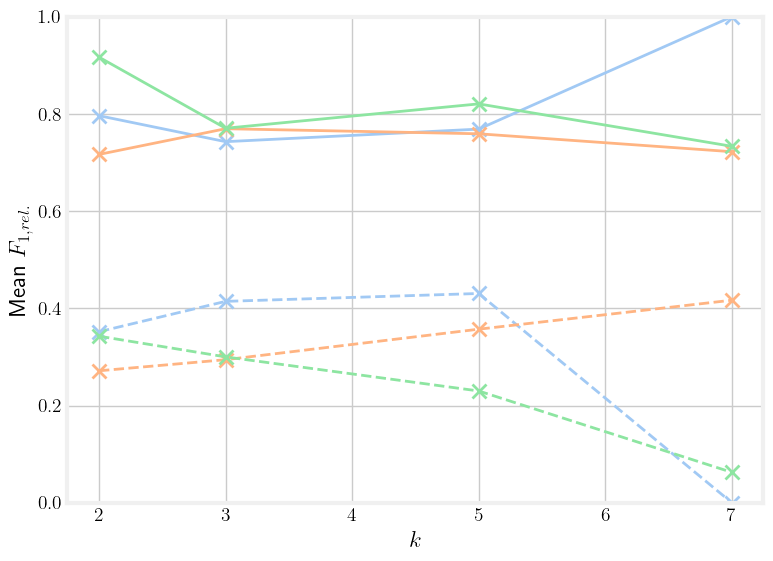

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


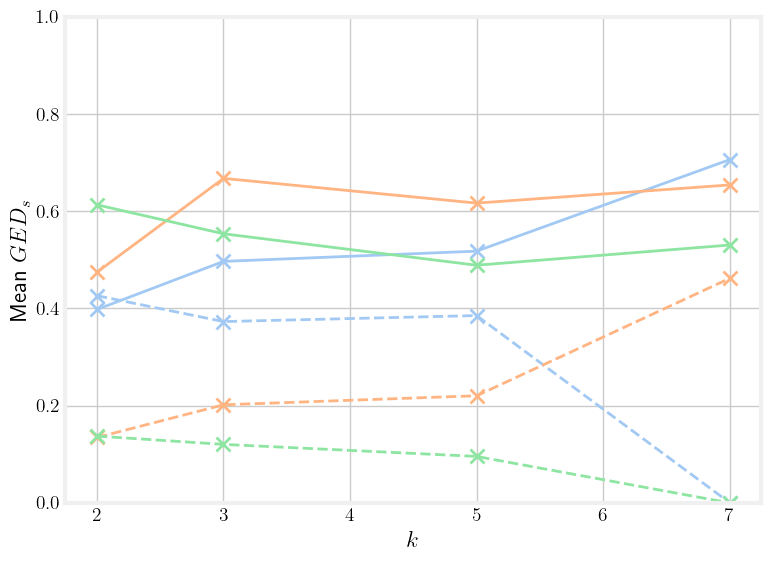

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


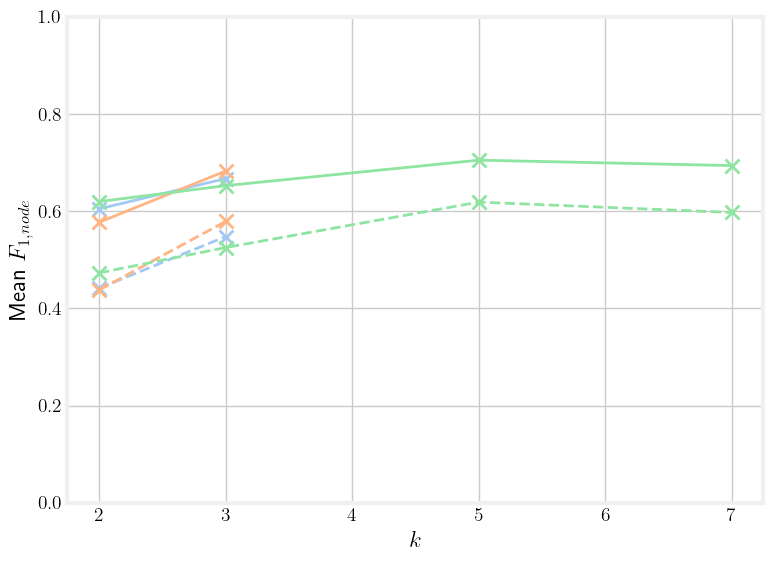

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


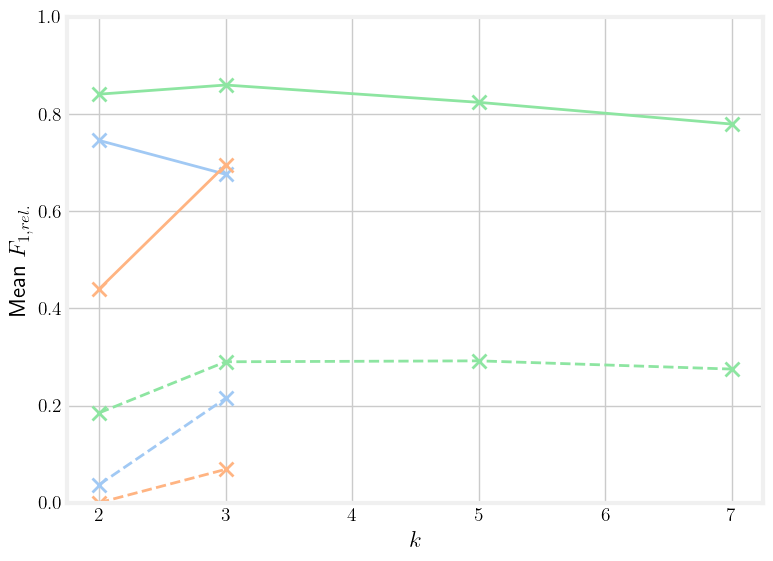

x solid #a1c9f4
x dashed #a1c9f4
x solid #ffb482
x dashed #ffb482
x solid #8de5a1
x dashed #8de5a1


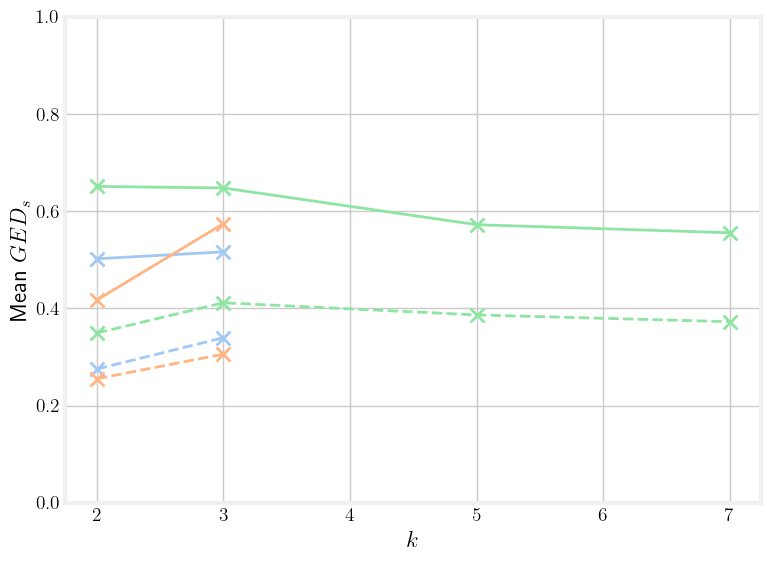

In [ ]:
for dataset in grouped_dfs_raw.keys():
    df = grouped_dfs_raw[dataset].reset_index()
    df = df[(df["prompt_type"] == "one shot") & (df["n_nodes"] < 8)]
    metrics = [
        "f1_score",
        "f1_score_rel",
        "normed_ged",
    ]
    for metric in metrics:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        # fig.suptitle(f"{column_map[metric]} for {dataset}")
        patterns_stage = {
            "aligned": "solid",
            "raw": "dashed",
        }
        markers_stage = {
            "aligned": "x",
            "raw": "x",
        }
        for i, model in enumerate(df["model"].unique()):
            for stage in df["stage"].unique():
                data = df[(df["stage"] == stage) & (df["model"] == model)]
                lower, median, upper, mean = tuple(
                    [
                        data[data["percentile"] == q][metric].to_numpy()
                        for q in quantiles + ["mean"]
                    ]
                )
                k = data[data["percentile"] == quantiles[1]]["n_nodes"].to_numpy()
                if not data.empty:
                    # ax.errorbar(
                    #     k,
                    #     median,
                    #     yerr=np.abs(np.stack([lower, upper]) - median),
                    #     label=f"{stage} - {model}",
                    #     marker=markers_stage[stage],
                    #     fillstyle="none",
                    #     markeredgecolor=palette[i],
                    #     # markeredgewidth=10,
                    #     # barsabove=
                    #     capsize=5,
                    #     linestyle=patterns_stage[stage],
                    #     color=palette[i],
                    #     ecolor=adjust_lightness(palette[i]),
                    # )
                    ax.plot(
                        k,
                        mean,
                        label=f"{stage} - {model}",
                        marker=markers_stage[stage],
                        fillstyle="none",
                        markeredgecolor=palette[i],
                        markersize=10,
                        markeredgewidth=2,
                        linewidth=2,
                        linestyle=patterns_stage[stage],
                        color=palette[i],
                    )
                    print(markers_stage[stage], patterns_stage[stage], palette[i])

        # ax.set_title(f"Comparison of {dataset} across stages and prompt types")
        ax.set_xlabel("$k$")
        ax.set_ylabel(f"Mean {column_map[metric]}")
        if metric == "f1_score" and dataset == "DBpedia":
            ax.legend(title="Stage - Model")
        ax.set_ylim(0, 1)
        tikzplotlib.save(
            f"figures/compare_{dataset}_{metric}.tex",
            extra_tikzpicture_parameters=[
                "scale=0.5",
                """every axis/.style={legend pos=south west, legend style={
                font=\\small}
                }""",
            ],
            axis_height="1.5\\textwidth",
            axis_width="2\\textwidth",
        )
        plt.show()

In [ ]:
np.stack([lower, upper]).shape

(2, 4)

In [ ]:
upper-lower

array([0.66666667, 0.4       , 0.36406926, 0.35664336])

In [ ]:
(upper - lower) / 2

array([0.33333333, 0.2       , 0.18203463, 0.17832168])